# Group Project: Web Scraping and Plotting

In [1]:
# By Gabriel Vanderkin

In [2]:
# imports
import urllib.request

url = "https://en.wikipedia.org/wiki/Wisconsin"
page = urllib.request.urlopen(url)

from bs4 import BeautifulSoup

soup = BeautifulSoup(page, "lxml")

In [3]:
# Display source for the site, to make sure we got the right one
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Wisconsin - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"301a1448-ccb1-4f38-b71c-f28edf0f3970","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Wisconsin","wgTitle":"Wisconsin","wgCurRevisionId":992030449,"wgRevisionId":992030449,"wgArticleId":33127,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Webarchive template wayback links","CS1 errors: missing periodical","CS1 maint: archived copy as title","All articles wi

### Meat of the code, filtering down the scraped data into what we're looking for

In [4]:
# Use the 'find_all' function to bring back all instances of the 'table' tag in the HTML  
# with class_='wiitable sortable'
all_sortable_tables = soup.find_all('table', class_='wikitable sortable')
all_sortable_tables

[<table class="wikitable sortable">
 <caption><b>Monthly normal high and low temperatures for selected Wisconsin cities</b> [°F (°C)]
 </caption>
 <tbody><tr>
 <th style="background: #e5afaa;">City
 </th>
 <th style="background: #e5afaa;">Jan
 </th>
 <th style="background: #e5afaa;">Feb
 </th>
 <th style="background: #e5afaa;">Mar
 </th>
 <th style="background: #e5afaa;">Apr
 </th>
 <th style="background: #e5afaa;">May
 </th>
 <th style="background: #e5afaa;">Jun
 </th>
 <th style="background: #e5afaa;">Jul
 </th>
 <th style="background: #e5afaa;">Aug
 </th>
 <th style="background: #e5afaa;">Sep
 </th>
 <th style="background: #e5afaa;">Oct
 </th>
 <th style="background: #e5afaa;">Nov
 </th>
 <th style="background: #e5afaa;">Dec
 </th></tr>
 <tr>
 <th><br/></th>
 <th data-sort-type="number"></th>
 <th data-sort-type="number"></th>
 <th data-sort-type="number"></th>
 <th data-sort-type="number"></th>
 <th data-sort-type="number"></th>
 <th data-sort-type="number"></th>
 <th data-sort-typ

In [5]:
# Find the first eligible table
right_table = all_sortable_tables[0]
right_table

<table class="wikitable sortable">
<caption><b>Monthly normal high and low temperatures for selected Wisconsin cities</b> [°F (°C)]
</caption>
<tbody><tr>
<th style="background: #e5afaa;">City
</th>
<th style="background: #e5afaa;">Jan
</th>
<th style="background: #e5afaa;">Feb
</th>
<th style="background: #e5afaa;">Mar
</th>
<th style="background: #e5afaa;">Apr
</th>
<th style="background: #e5afaa;">May
</th>
<th style="background: #e5afaa;">Jun
</th>
<th style="background: #e5afaa;">Jul
</th>
<th style="background: #e5afaa;">Aug
</th>
<th style="background: #e5afaa;">Sep
</th>
<th style="background: #e5afaa;">Oct
</th>
<th style="background: #e5afaa;">Nov
</th>
<th style="background: #e5afaa;">Dec
</th></tr>
<tr>
<th><br/></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="number"></th>
<th data-sort-type="nu

### generate the table, over a few steps

In [6]:
# Make all the right lists and fill them with data from the scraped table
A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []
K = []
L = []
M = []

for row in right_table.findAll('tr'):
    city = row.findAll('a')
    cells = row.findAll('td')
    if len(cells) == 12:
        A.append(city[0].find(text=True))
        B.append(cells[0].find(text=True))
        C.append(cells[1].find(text=True))
        D.append(cells[2].find(text=True))
        E.append(cells[3].find(text=True))
        F.append(cells[4].find(text=True))
        G.append(cells[5].find(text=True))
        H.append(cells[6].find(text=True))
        I.append(cells[7].find(text=True))
        J.append(cells[8].find(text=True))
        K.append(cells[9].find(text=True))
        L.append(cells[10].find(text=True))
        M.append(cells[11].find(text=True))

### Create the Dataframe object

In [7]:
import pandas as pd
df = pd.DataFrame(A, columns=['City'])
df['Jan'] = B
df['Feb'] = C
df['Mar'] = D
df['Apr'] = E
df['May'] = F
df['Jun'] = G
df['Jul'] = H
df['Aug'] = I
df['Sep'] = J
df['Oct'] = K
df['Nov'] = L
df['Dec'] = M
df

,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Green Bay,25/10,29/13,40/23,55/35,67/45,76/55,81/59,79/58,71/49,58/38,43/28,30/15
1,Hurley,19/0,26/4,36/16,49/29,65/41,73/50,76/56,75/54,65/46,53/35,36/22,24/8
2,La Crosse,26/6,32/13,45/24,60/37,72/49,81/58,85/63,82/61,74/52,61/40,44/27,30/14
3,Madison,27/11,32/15,44/25,58/36,69/46,79/56,82/61,80/59,73/50,60/39,45/28,31/16
4,Milwaukee,29/16,33/19,42/28,54/37,65/47,75/57,80/64,79/63,71/55,59/43,46/32,33/20
5,Superior,21/2,26/6,35/17,46/29,56/38,66/47,75/56,74/57,65/47,52/36,38/23,25/9


### Rearrange, filter, and reformat the data into a CSV

In [8]:
# Record the average monthly low temparatures of wisconin's cities throughout a year

# Change the orientation of the list so the next section reads it better

listoflists = [['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],[],[],[],[],[],[]]

# Iterates over the list, filling it with the correct values.
index = 1
while index < 7:
    # print(df['City'][index-1])
    listoflists[index].append(df['Jan'][index-1].split('/')[1])
    listoflists[index].append(df['Feb'][index-1].split('/')[1])
    listoflists[index].append(df['Mar'][index-1].split('/')[1])
    listoflists[index].append(df['Apr'][index-1].split('/')[1])
    listoflists[index].append(df['May'][index-1].split('/')[1])
    listoflists[index].append(df['Jun'][index-1].split('/')[1])
    listoflists[index].append(df['Jul'][index-1].split('/')[1])
    listoflists[index].append(df['Aug'][index-1].split('/')[1])
    listoflists[index].append(df['Sep'][index-1].split('/')[1])
    listoflists[index].append(df['Oct'][index-1].split('/')[1])
    listoflists[index].append(df['Nov'][index-1].split('/')[1])
    listoflists[index].append(df['Dec'][index-1].split('/')[1])
    index += 1

# Save that as a dataframe, and display it

dfLo = pd.DataFrame(listoflists[0], columns=['Month'])
dfLo['Green Bay'] = listoflists[1]
dfLo['Hurley'] = listoflists[2]
dfLo['La Crosse'] = listoflists[3]
dfLo['Madison'] = listoflists[4]
dfLo['Milwaukee'] = listoflists[5]
dfLo['Superior'] = listoflists[6]
dfLo

,Month,Green Bay,Hurley,La Crosse,Madison,Milwaukee,Superior
0,Jan,10,0,6,11,16,2
1,Feb,13,4,13,15,19,6
2,Mar,23,16,24,25,28,17
3,Apr,35,29,37,36,37,29
4,May,45,41,49,46,47,38
5,Jun,55,50,58,56,57,47
6,Jul,59,56,63,61,64,56
7,Aug,58,54,61,59,63,57
8,Sep,49,46,52,50,55,47
9,Oct,38,35,40,39,43,36


### Export the corrected dataframe as a csv, for the next sections.

In [9]:
# Save that dataframe as a CSV

dfLo.to_csv(r'wis_city_lows.csv', index=False)

### Create the plot

In [10]:
# Packages / libraries
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
# Load the data from the file
raw_data = pd.read_csv("wis_city_lows.csv")
# Display the shape of the data
raw_data.shape
# Display the first 6 rows of data from the file
raw_data.head(6)

,Month,Green Bay,Hurley,La Crosse,Madison,Milwaukee,Superior
0,Jan,10,0,6,11,16,2
1,Feb,13,4,13,15,19,6
2,Mar,23,16,24,25,28,17
3,Apr,35,29,37,36,37,29
4,May,45,41,49,46,47,38
5,Jun,55,50,58,56,57,47


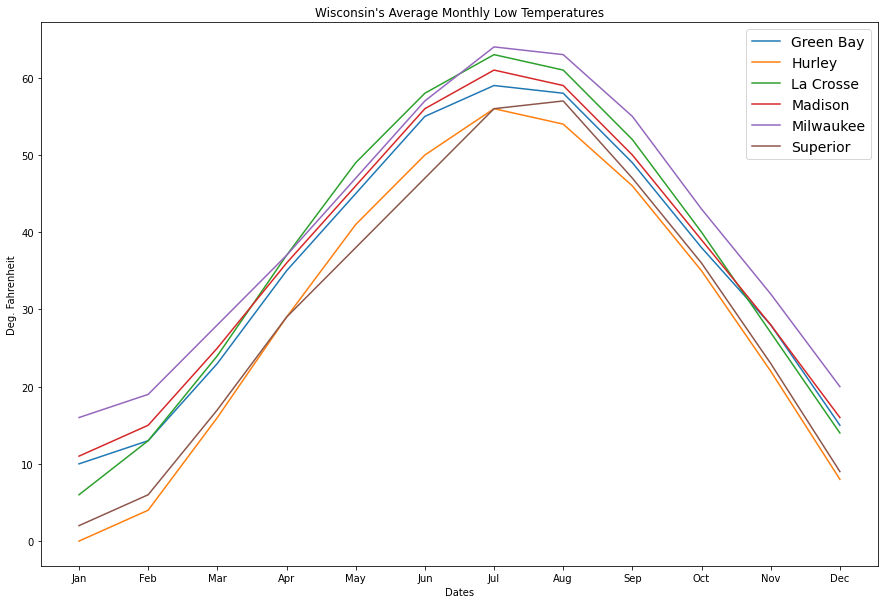

In [12]:
# Display the scraped data as a line plot

plt.figure(figsize=(15, 10))

plt.plot(range(0, len(raw_data)), raw_data["Green Bay"], label = "Green Bay")
plt.plot(range(0, len(raw_data)), raw_data["Hurley"], label = "Hurley")
plt.plot(range(0, len(raw_data)), raw_data["La Crosse"], label = "La Crosse")
plt.plot(range(0, len(raw_data)), raw_data["Madison"], label = "Madison")
plt.plot(range(0, len(raw_data)), raw_data["Milwaukee"], label = "Milwaukee")
plt.plot(range(0, len(raw_data)), raw_data["Superior"], label = "Superior")
plt.xticks(ticks=range(0, len(raw_data)), labels=raw_data["Month"])


plt.title("Wisconsin's Average Monthly Low Temperatures")
plt.xlabel("Dates")
plt.ylabel("Deg. Fahrenheit")
plt.legend(fontsize=14, loc="upper right")

plt.show()